In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.shape

(962, 2)

In [5]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Category'>

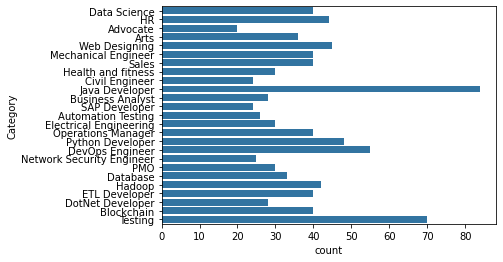

In [6]:
sns.countplot(df['Category'])

In [7]:
df['Category'][0]

'Data Science'

In [8]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [9]:
print('Orginal Category')
print(df['Category'].value_counts())

max_size = df['Category'].value_counts().max()
print(max_size)

balanced_df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace= True)).reset_index(drop=True)

df = balanced_df.sample(frac=1).reset_index(drop = True)

print('Balanced Category')
print(df['Category'].value_counts())

Orginal Category
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64
84
Balanced Category
Category
Data Science                 84
Mechanical Engineer          84
HR                           84
Web Designing         

<ipython-input-9-6a81e4d34873>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace= True)).reset_index(drop=True)


In [10]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [11]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
df['Category']=le.fit_transform(df['Category'])

In [14]:
df['Category'].unique()

array([ 6,  8,  2,  0,  3, 18, 14, 11,  7, 22, 20, 23,  5, 16, 10, 17,  4,
       21,  9, 15, 19,  1, 24, 12, 13])

In [15]:
#df['Category'].value_counts()

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

required_text = tfidf.fit_transform(df['Resume'])

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(required_text, df['Category'], test_size=0.2, random_state=42)

In [18]:
X_train.shape

(1680, 7298)

In [19]:
X_test.shape

(420, 7298)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [21]:
X_train = X_train.toarray() if hasattr(X_train, 'toarray') else X_train
X_test = X_test.toarray() if hasattr(X_test, 'toarray') else X_test

In [22]:
knn_model = OneVsRestClassifier(KNeighborsClassifier())
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("\nKNeighborsClassifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
#print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_knn)}")
#print(f"Classification Report:\n{classification_report(y_test, y_pred_knn)}")


KNeighborsClassifier Results:
Accuracy: 1.0000


In [23]:
svc_model = OneVsRestClassifier(SVC())
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
print("\nSVC Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")
#print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_svc)}")
#print(f"Classification Report:\n{classification_report(y_test, y_pred_svc)}")


SVC Results:
Accuracy: 1.0000


In [24]:
rf_model = OneVsRestClassifier(RandomForestClassifier())
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandomForestClassifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
#print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}")
#print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")


RandomForestClassifier Results:
Accuracy: 1.0000


In [25]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(svc_model, open('clf.pkl', 'wb'))
pickle.dump(le, open("encoder.pkl",'wb'))

In [26]:
def pred(input_resume):

    cleaned_text = cleanResume(input_resume)


    vectorized_text = tfidf.transform([cleaned_text])


    vectorized_text = vectorized_text.toarray()


    predicted_category = svc_model.predict(vectorized_text)


    predicted_category_name = le.inverse_transform(predicted_category)

    return predicted_category_name[0]

In [27]:
my_resume = ''' Skills
 Programming : Python, C++
 Machine Learning : TensorFlow, scikit-learn, Supervised Learning, Unsupervised
Learning, Deep Learning (ANN,CNN,RNN), NLP, Computer Vision
 Data Handling : Numpy, Pandas, Matplotlib, Seaborn, Feature Engineering,
Evaluation, Data Pre-processing, Data Cleaning, Cross-Validation
Projects
Object Recognition - Github
 Build and compared image classification models (CNN, ResNet-50) on CIFAR-10
dataset.
 Demonstrated strong accuracy of 0.93 in object classification, showcasing the models
ability to learn visual features.
Fashion Image Classifier - Github
 Implemented a Conventional Neural Network to classify fashion articles from the
Fashion MNIST dataset.
 Demonstrated high accuracy of 0.89 in image recognition showcasing the model’s
ability to learn complex visual patterns.
Fake News Predictor - Github
 Developed a text classification model using Logistic Regression to identify fake news
articles.
 Achieved a strong accuracy rate of 0.97, highlighting the models potential to combat
misinformation.
Calories Burnt Estimator - Github
 Developed a predictive model using XGBoost to accurately estimate calorie
expenditure based on exercise
 Achieved an impressive Mean Absolute Error of 1.48, demonstrating the model’s
effectiveness in personalized health tracking
Face Mask Detector - Github
 Developed a CNN model to detect face masks in images.
 Achieved a high accuracy rate of 0.92, highlighting the models potential for real world
applications in public health and safety.
Rock vs Mine Prediction - Github
 Built a classification model using Logistic Regression to distinguish between sonar
signals from mines and rocks
 Demonstrated accuracy of 0.76 showcasing the model’s ability to learn from sonar data.
Education
 M.E in Communication Systems
 SSN College of Engineering, Chennai (2021-2023).
 B.E in Electronics and Communication Engineering
 Panimalar Engineering College, Chennai (2017-2021).'''

pred(my_resume)

'Data Science'